In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import matplotlib

<IPython.core.display.Javascript object>


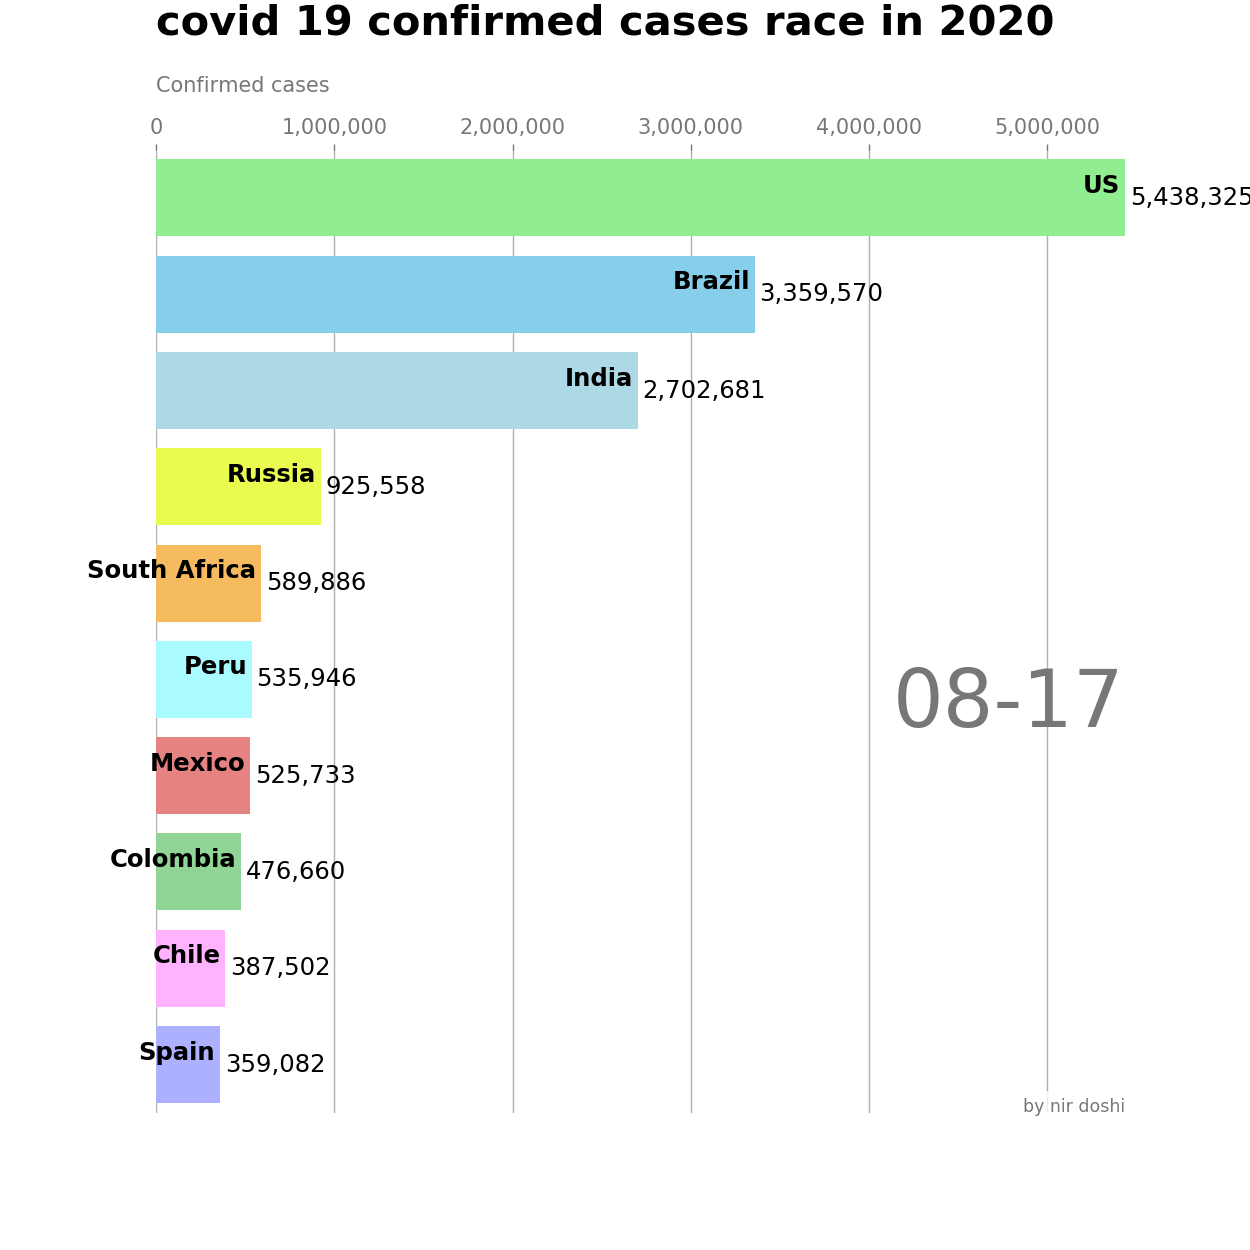

In [2]:
%matplotlib notebook
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Country')
top_10=df.groupby('Country')['Confirmed'].last()
top_10=top_10.nlargest(10);

#Country
#US              5361165
#Brazil          3317096
#India           2589952
#Russia           915808
#South Africa     583653
#Mexico           517714
#Peru             516296
#Colombia         456689
#Chile            383902
#Spain            342813
#Name: Confirmed, dtype: int64

df['month-day']=df['Date'].dt.strftime('%m-%d')
df['month']=df['Date'].dt.strftime('%m');
df=df.reset_index()
df=df[(df['Country']=='US') | (df['Country']=='Brazil') | (df['Country']=='India')
                     | (df['Country']=='Russia')| (df['Country']=='South Africa')| (df['Country']=='Mexico')
                     | (df['Country']=='Peru')| (df['Country']=='Colombia')| (df['Country']=='Chile')
                     | (df['Country']=='Spain')]
df=df.set_index(df['month-day'])
fig, ax = plt.subplots(figsize=(10,10))
colors=['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50','lightblue','skyblue','lightgreen']
temp=df['month-day'].unique()
def draw_barchart(year):
    data=temp[year]
    dff = df[df['month-day'].eq(data)].sort_values(by='Confirmed', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country'], dff['Confirmed'],color=colors)
    dx = dff['Confirmed'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Country'])):
        ax.text(value-dx, i,name, size=14, weight=800, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, group_lk[name], size=8, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,f'{value:,.0f}',size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, data, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500)
    ax.text(0, 1.06, 'Confirmed cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    ax.text(0, 1.12, 'covid 19 confirmed cases race in 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by nir doshi', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
#draw_barchart(100)
ani=matplotlib.animation.FuncAnimation(fig,draw_barchart,frames=len(temp),interval=100,repeat=False,save_count=100)

<IPython.core.display.Javascript object>


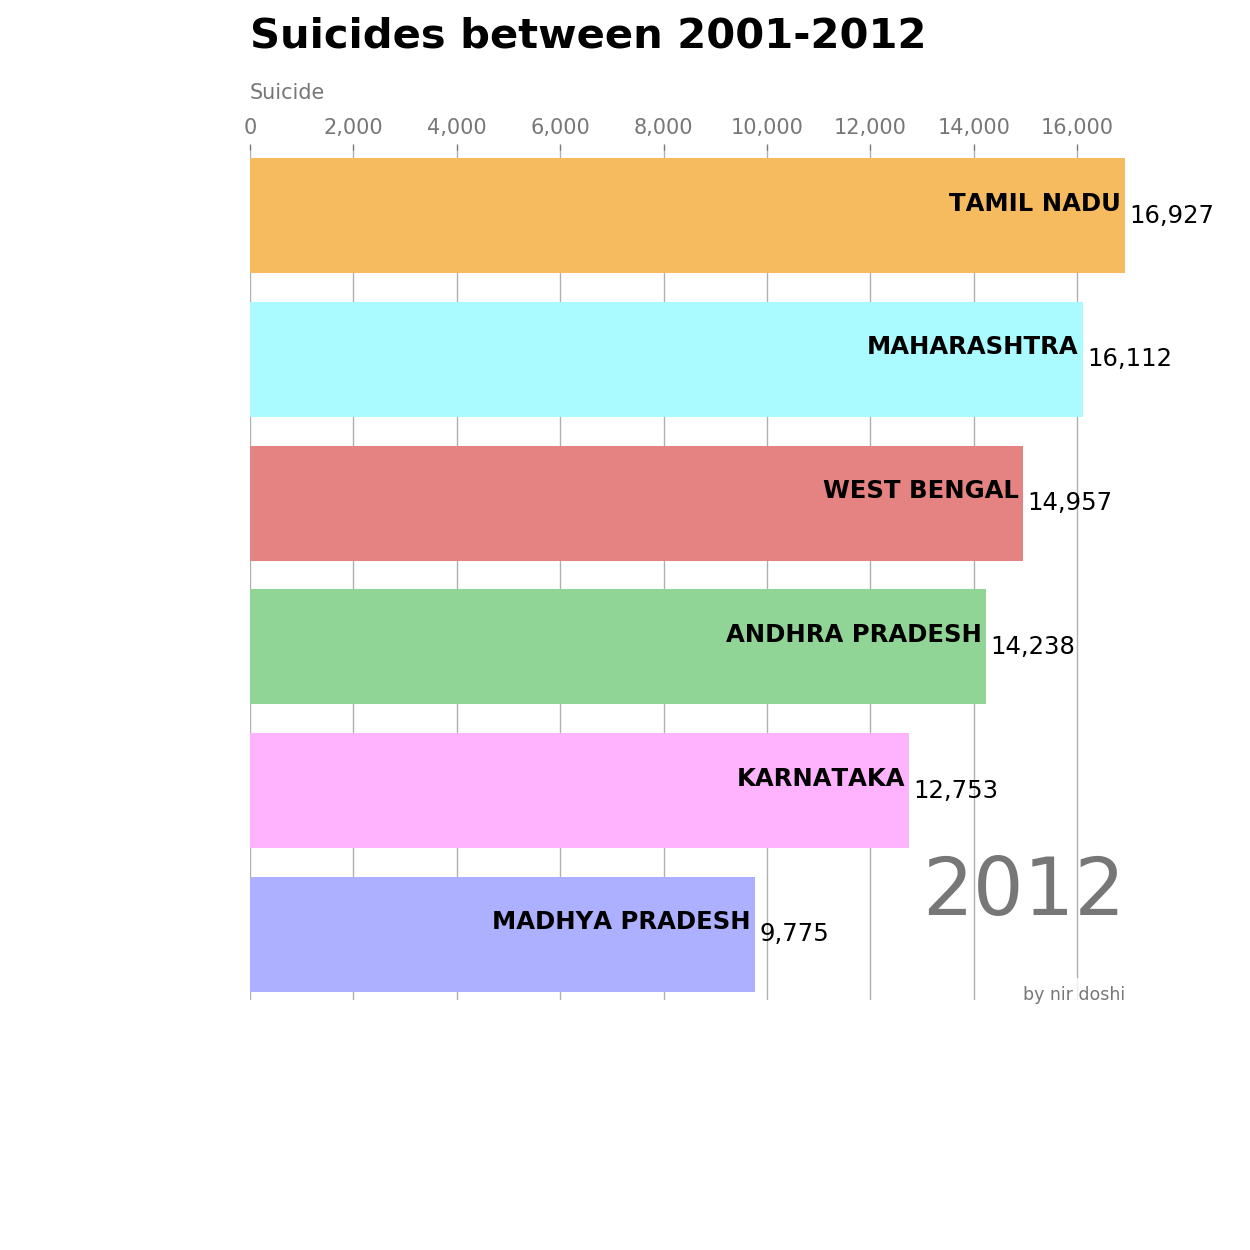

In [4]:
%matplotlib notebook
suicide=pd.read_csv('https://raw.githubusercontent.com/nirdoshi/Data-Science/master/data/Social_status_of_suicide_victims_state.csv')
suicide=suicide[suicide['CAUSE']=='Total']
suicide=suicide.set_index('STATE/UT')
#suicide=suicide.drop()
#suicide=suicide[suicide['STATE/UT']=='TOTAL (ALL INDIA)']
suicide=suicide.drop(['TOTAL (ALL INDIA)','TOTAL (UTs)','TOTAL (STATES)'])

sl=suicide.groupby('STATE/UT')['Total'].last()
sl=sl.nlargest(7)
#TAMIL NADU        16927
#MAHARASHTRA       16112
#WEST BENGAL       14957
#ANDHRA PRADESH    14238
#KARNATAKA         12753
#MADHYA PRADESH     9775
#KERALA             8490
suicide=suicide.reset_index()
suicide=suicide[(suicide['STATE/UT']=='TAMIL NADU') |(suicide['STATE/UT']=='MAHARASHTRA')|
                (suicide['STATE/UT']=='WEST BENGAL') |(suicide['STATE/UT']=='ANDHRA PRADESH') |
               (suicide['STATE/UT']=='KARNATAKA') | (suicide['STATE/UT']=='MADHYA PRADESH') |
               (suicide['STATE/UT']=='KERALA  ')]

fig= plt.figure(figsize=(10,10))
plt.subplots_adjust(bottom = 0.2,left=0.2)
ax=plt.gca()
colors=['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50']

def animate(year):
    dff = suicide[suicide['Year'].eq(year)].sort_values(by='Total', ascending=True).tail(7)
    ax.clear()
    ax.barh(dff['STATE/UT'], dff['Total'],color=colors)
    dx = dff['Total'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Total'], dff['STATE/UT'])):
        ax.text(value-dx, i,name, size=14, weight=800, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, group_lk[name], size=8, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,f'{value:,.0f}',size=14, ha='left',  va='center')
    # ... polished styles
    
    ax.text(1, 0.1, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500)
    ax.text(0, 1.06, 'Suicide', transform=ax.transAxes, size=12, color='#777777')
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    ax.text(0, 1.12, 'Suicides between 2001-2012',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by nir doshi', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

#animate(2002)

ani=matplotlib.animation.FuncAnimation(fig,animate,frames=range(2001,2013),interval=500,repeat=False)


<IPython.core.display.Javascript object>


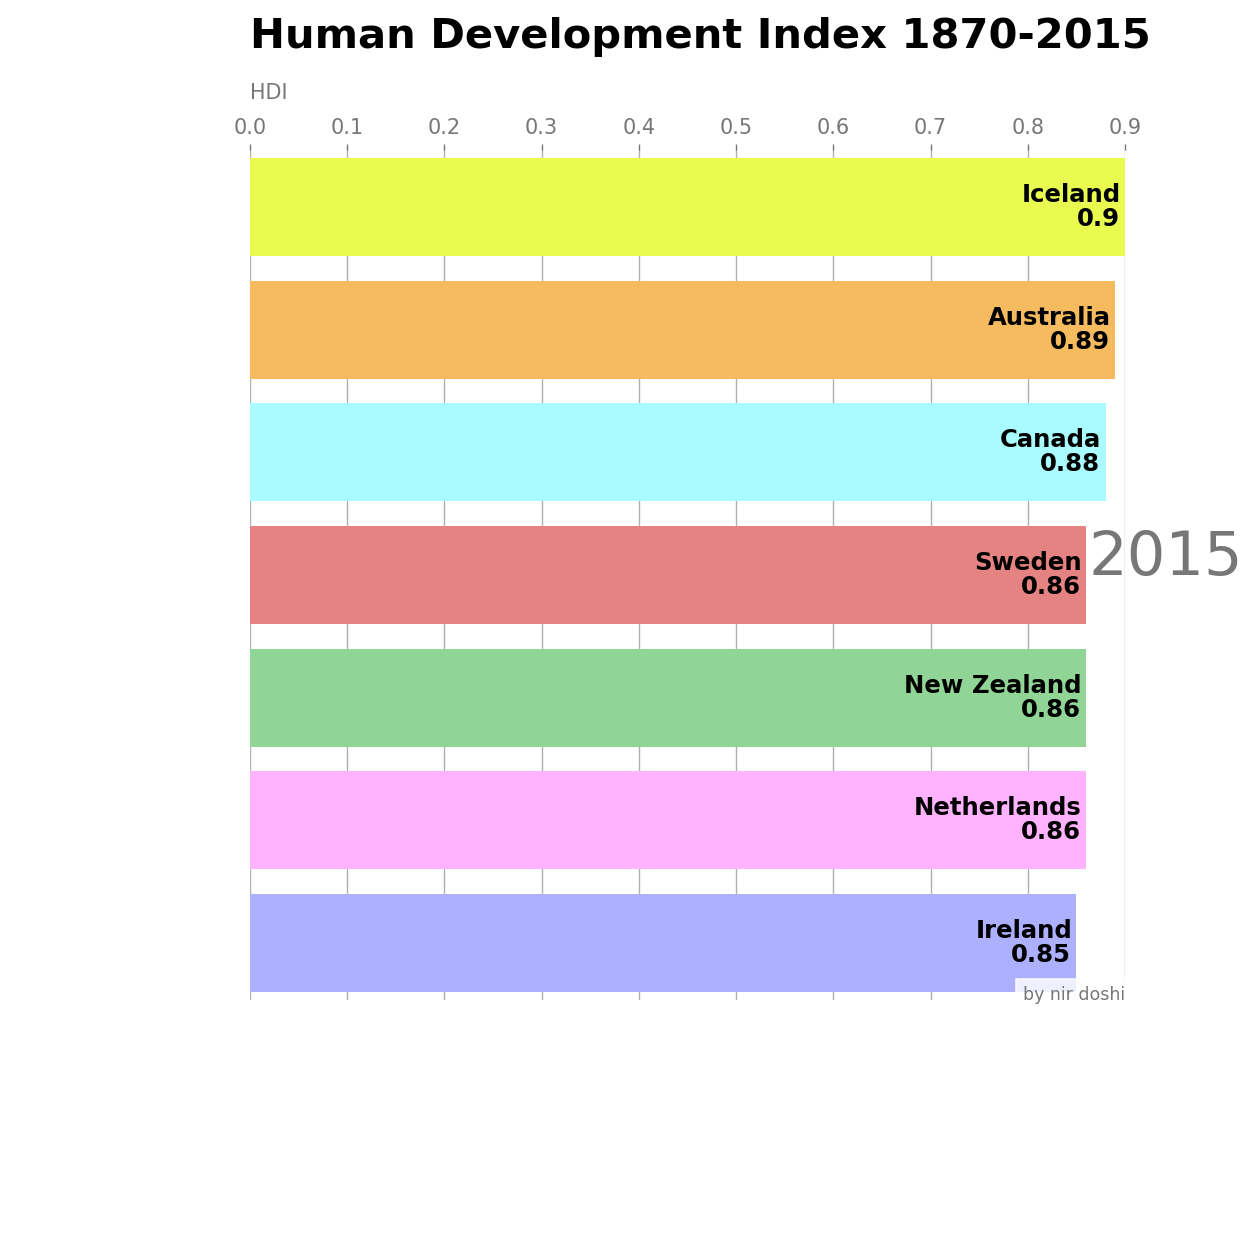

In [7]:
%matplotlib notebook
curr=pd.read_csv(r'D:\data science\data\human-development-index.csv')
curr=curr.rename(columns={'Historical Index of Human Development ((0-1; higher values are better))':'HDI'})
curr=curr.set_index('Entity')
temp=curr[curr['Year']==2015]['HDI'].nlargest(7)
#Iceland        0.90
#Australia      0.89
#Canada         0.88
#Netherlands    0.86
#New Zealand    0.86
#Sweden         0.86
#Ireland        0.85

curr=curr.reset_index()
curr=curr[(curr['Entity']=='Australia') |(curr['Entity']=='Canada') |
         (curr['Entity']=='Netherlands') | (curr['Entity']=='New Zealand') | (curr['Entity']=='Sweden') |
         (curr['Entity']=='Ireland')| (curr['Entity']=='Iceland')]

#curr['Year']=pd.to_datetime(curr['Year'])
fig= plt.figure(figsize=(10,10))
plt.subplots_adjust(bottom = 0.2,left=0.2)
ax=plt.gca()
#plt.xticks(range(min(curr['HDI']), max(curr[HDI]))
colors=['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50']
yearlist=curr['Year'].unique()
def hdi(i):
    year=yearlist[i]
    dff = curr[curr['Year']==year].sort_values(by='HDI', ascending=True).tail(7)
    ax.clear()
    
    ax.barh(dff['Entity'], dff['HDI'],color=colors)
    dx=dff['HDI'].max()/200
    for i,(value,name) in enumerate(zip(dff['HDI'],dff['Entity'])):
        ax.text(value-dx,i,name,size=14, weight=800, ha='right', va='bottom')
        ax.text(value+dx-0.01,i,value,size=14, weight=800, ha='right', va='top')
    
    ax.text(1.135,0.5,year,transform=ax.transAxes, color='#777777', size=35, weight=500,ha='right')
    ax.text(0,1.06,'HDI',transform=ax.transAxes, color='#777777', size=12)
    
    #ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    ax.text(0, 1.12, 'Human Development Index 1870-2015',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by nir doshi', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
#hdi(23)
#array([1870, 1880, 1890, 1900, 1913, 1925, 1929, 1933, 1938, 1950, 1955,
       #1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2007,
       #2010, 2015], dtype=int64)
ani=matplotlib.animation.FuncAnimation(fig,hdi,frames=len(yearlist),interval=500,repeat=False)